# Linea A

Hipotesis: 
La cercania a las estaciones de la linea A influye en el precio de las propiedades, para esto tomaremos los barrios que son recorridos por la linea A y veremos si la distancia a las paradas de est influye en el precio de las propiedades.
Primer aproach, tomamos cada barrio vemos cuales son las distnacia de sus propiedades a las paradas y tomamos la menor luego realizamos un scatter plot con estos datos y vemos si la distribucion del precio influye en esta

subte A: inicia entre los barrios (Monserrat y San nicolas) , luego balvanera, Almagro y caballito

In [13]:
import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config IPCompleter.greedy=True

#Data de properati
df = pd.read_csv('/home/matias/Escritorio/notebook/properati-AR-2017-08-01-properties-sell.csv')

#Filtramos solo las propiedades de Capital Federal
propCF = df[df['state_name']== 'Capital Federal']

propCFf = propCF[['property_type','place_name','rooms','lat','lon','price']]

propRecorridoA= propCFf[propCFf.place_name.str.contains('Monserrat') |
                        propCFf.place_name.str.contains('San Nicolas')| #No hay datos de San Nicolas
                        propCFf.place_name.str.contains('Balvanera')|
                        propCFf.place_name.str.contains('Almagro')|
                        propCFf.place_name.str.contains('Flores')|
                        propCFf.place_name.str.contains('Caballito')]

propRecorridoA.dropna(inplace = True)
propRecorridoA.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4415 entries, 358 to 186077
Data columns (total 6 columns):
property_type    4415 non-null object
place_name       4415 non-null object
rooms            4415 non-null float64
lat              4415 non-null float64
lon              4415 non-null float64
price            4415 non-null float64
dtypes: float64(4), object(2)
memory usage: 241.4+ KB


/home/matias/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [14]:
df = pd.read_csv('/home/matias/Escritorio/notebook/estaciones-de-subte.csv')
df.head()

estacionesA = df[df['LINEA'] == 'A']
estacionesA.head(20)

,X,Y,ID,ESTACION,LINEA
30,-58.374268,-34.608559,31.0,PERU,A
31,-58.379085,-34.608882,32.0,PIEDRAS,A
32,-58.382232,-34.609100,33.0,LIMA,A
33,-58.386777,-34.609413,34.0,SAENZ PE�A,A
34,-58.392669,-34.609226,35.0,CONGRESO,A
35,-58.398427,-34.609646,36.0,PASCO,A
36,-58.401208,-34.609834,37.0,ALBERTI,A
37,-58.406707,-34.609817,38.0,PLAZA DE MISERERE,A
38,-58.415186,-34.610782,39.0,LORIA,A
39,-58.421816,-34.611770,40.0,CASTRO BARROS,A


In [16]:
#Peru
peru_lon = estacionesA.loc[estacionesA.index[0],'X']
peru_lat = estacionesA.loc[estacionesA.index[0],'Y']
propRecorridoA['peru_lon'] = peru_lon
propRecorridoA['peru_lat'] = peru_lat

#Piedras
piedras_lon = estacionesA.loc[estacionesA.index[1],'X']
piedras_lat = estacionesA.loc[estacionesA.index[1],'Y']
propRecorridoA['piedras_lon'] = piedras_lon
propRecorridoA['piedras_lat'] = piedras_lat
#Lima
lima_lon = estacionesA.loc[estacionesA.index[2],'X']
lima_lat = estacionesA.loc[estacionesA.index[2],'Y']
propRecorridoA['lima_lon'] = lima_lon
propRecorridoA['lima_lat'] = lima_lat
#Saenz
saenz_lon = estacionesA.loc[estacionesA.index[3],'X']
saenz_lat = estacionesA.loc[estacionesA.index[3],'Y']
propRecorridoA['saenz_lon'] = saenz_lon
propRecorridoA['saenz_lat'] = saenz_lat
#Congreso
congreso_lon = estacionesA.loc[estacionesA.index[4],'X']
congreso_lat = estacionesA.loc[estacionesA.index[4],'Y']
propRecorridoA['congreso_lon'] = congreso_lon
propRecorridoA['congreso_lat'] = congreso_lat
#Pasco
pasco_lon = estacionesA.loc[estacionesA.index[5],'X']
pasco_lat = estacionesA.loc[estacionesA.index[5],'Y']
propRecorridoA['pasco_lon'] = pasco_lon
propRecorridoA['pasco_lat'] = pasco_lat
#Alberti
alberti_lon = estacionesA.loc[estacionesA.index[6],'X']
alberti_lat = estacionesA.loc[estacionesA.index[6],'Y']
propRecorridoA['alberti_lon'] = alberti_lon
propRecorridoA['alberti_lat'] = alberti_lat
#Miserere
miserere_lon = estacionesA.loc[estacionesA.index[7],'X']
miserere_lat = estacionesA.loc[estacionesA.index[7],'Y']
propRecorridoA['miserere_lon'] = miserere_lon
propRecorridoA['miserere_lat'] = miserere_lat
#Loria
loria_lon = estacionesA.loc[estacionesA.index[8],'X']
loria_lat = estacionesA.loc[estacionesA.index[8],'Y']
propRecorridoA['loria_lon'] = loria_lon
propRecorridoA['loria_lat'] = loria_lat
#Castro Barros
castroBarros_lon = estacionesA.loc[estacionesA.index[9],'X']
castroBarros_lat = estacionesA.loc[estacionesA.index[9],'Y']
propRecorridoA['castroBarros_lon'] = castroBarros_lon
propRecorridoA['castroBarros_lat'] = castroBarros_lat
#Rio de Janeiro
janeiro_lon = estacionesA.loc[estacionesA.index[10],'X']
janeiro_lat = estacionesA.loc[estacionesA.index[10],'Y']
propRecorridoA['janeiro_lon'] = janeiro_lon
propRecorridoA['janeiro_lat'] = janeiro_lat
#Acoyte
acoyte_lon = estacionesA.loc[estacionesA.index[11],'X']
acoyte_lat = estacionesA.loc[estacionesA.index[11],'Y']
propRecorridoA['acoyte_lon'] = acoyte_lon
propRecorridoA['acoyte_lat'] = acoyte_lat
#Primera Junta
primeraJunta_lon = estacionesA.loc[estacionesA.index[12],'X']
primeraJunta_lat = estacionesA.loc[estacionesA.index[12],'Y']
propRecorridoA['primeraJunta_lon'] = primeraJunta_lon
propRecorridoA['primeraJunta_lat'] = primeraJunta_lat
#Plaza de mayo
plazaMayo_lon = estacionesA.loc[estacionesA.index[13],'X']
plazaMayo_lat = estacionesA.loc[estacionesA.index[13],'Y']
propRecorridoA['plazaMayo_lon'] = plazaMayo_lon
propRecorridoA['plazaMayo_lat'] = plazaMayo_lat
#Carabobo
carabobo_lon = estacionesA.loc[estacionesA.index[14],'X']
carabobo_lat = estacionesA.loc[estacionesA.index[14],'Y']
propRecorridoA['carabobo_lon'] = carabobo_lon
propRecorridoA['carabobo_lat'] = carabobo_lat
#Puan
puan_lon = estacionesA.loc[estacionesA.index[15],'X']
puan_lat = estacionesA.loc[estacionesA.index[15],'Y']
propRecorridoA['puan_lon'] = puan_lon
propRecorridoA['puan_lat'] = puan_lat
#San Pedrito
sanPedrito_lon = estacionesA.loc[estacionesA.index[16],'X']
sanPedrito_lat = estacionesA.loc[estacionesA.index[16],'Y']
propRecorridoA['sanPedrito_lon'] = sanPedrito_lon
propRecorridoA['sanPedrito_lat'] = sanPedrito_lat
#Flores
flores_lon = estacionesA.loc[estacionesA.index[17],'X']
flores_lat = estacionesA.loc[estacionesA.index[17],'Y']
propRecorridoA['flores_lon'] = flores_lon
propRecorridoA['flores_lat'] = flores_lat


propRecorridoA.info()

/home/matias/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/matias/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/matias/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4415 entries, 358 to 186077
Data columns (total 42 columns):
property_type       4415 non-null object
place_name          4415 non-null object
rooms               4415 non-null float64
lat                 4415 non-null float64
lon                 4415 non-null float64
price               4415 non-null float64
peru_lon            4415 non-null float64
peru_lat            4415 non-null float64
piedras_lon         4415 non-null float64
piedras_lat         4415 non-null float64
lima_lon            4415 non-null float64
lima_lat            4415 non-null float64
saenz_lon           4415 non-null float64
saenz_lat           4415 non-null float64
congreso_lon        4415 non-null float64
congreso_lat        4415 non-null float64
pasco_lon           4415 non-null float64
pasco_lat           4415 non-null float64
alberti_lon         4415 non-null float64
alberti_lat         4415 non-null float64
miserere_lon        4415 non-null float64
miserere_

/home/matias/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/matias/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/matias/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/sta

In [17]:
#Peru
propRecorridoA['dist_peru'] = np.absolute(propRecorridoA['lon'] - propRecorridoA['peru_lon'])+ np.absolute(propRecorridoA['lat'] - propRecorridoA['peru_lat'])
#Piedras
propRecorridoA['dist_piedras'] = np.absolute(propRecorridoA['lon'] - propRecorridoA['piedras_lon'])+ np.absolute(propRecorridoA['lat'] - propRecorridoA['piedras_lat'])
#Lima
propRecorridoA['dist_lima'] = np.absolute(propRecorridoA['lon'] - propRecorridoA['lima_lon'])+ np.absolute(propRecorridoA['lat'] - propRecorridoA['lima_lat'])
#Saenz
propRecorridoA['dist_saenz'] = np.absolute(propRecorridoA['lon'] - propRecorridoA['saenz_lon'])+ np.absolute(propRecorridoA['lat'] - propRecorridoA['saenz_lat'])
#Congreso
propRecorridoA['dist_congreso'] = np.absolute(propRecorridoA['lon'] - propRecorridoA['congreso_lon'])+ np.absolute(propRecorridoA['lat'] - propRecorridoA['congreso_lat'])
#Pasco
propRecorridoA['dist_pasco'] = np.absolute(propRecorridoA['lon'] - propRecorridoA['pasco_lon'])+ np.absolute(propRecorridoA['lat'] - propRecorridoA['pasco_lat'])
#Alberti
propRecorridoA['dist_alberti'] = np.absolute(propRecorridoA['lon'] - propRecorridoA['alberti_lon'])+ np.absolute(propRecorridoB['lat'] - propRecorridoA['alberti_lat'])
#Miserere
propRecorridoA['dist_miserere'] = np.absolute(propRecorridoA['lon'] - propRecorridoA['miserere_lon'])+ np.absolute(propRecorridoB['lat'] - propRecorridoA['miserere_lat'])
#Loria
propRecorridoA['dist_loria'] = np.absolute(propRecorridoA['lon'] - propRecorridoA['loria_lon'])+ np.absolute(propRecorridoB['lat'] - propRecorridoA['loria_lat'])
#Castro Barros
propRecorridoA['dist_castroBarros'] = np.absolute(propRecorridoA['lon'] - propRecorridoA['castroBarros_lon'])+ np.absolute(propRecorridoB['lat'] - propRecorridoA['castroBarros_lat'])
#Janeiro
propRecorridoA['dist_janeiro'] = np.absolute(propRecorridoA['lon'] - propRecorridoA['janeiro_lon'])+ np.absolute(propRecorridoB['lat'] - propRecorridoA['janeiro_lat'])
#Acoyte
propRecorridoA['dist_acoyte'] = np.absolute(propRecorridoA['lon'] - propRecorridoA['acoyte_lon'])+ np.absolute(propRecorridoA['lat'] - propRecorridoA['acoyte_lat'])
#Primera Junta
propRecorridoA['dist_primeraJunta'] = np.absolute(propRecorridoA['lon'] - propRecorridoA['primeraJunta_lon'])+ np.absolute(propRecorridoA['lat'] - propRecorridoA['primeraJunta_lat'])
#Plaza de Mayo
propRecorridoA['dist_plazaMayo'] = np.absolute(propRecorridoA['lon'] - propRecorridoA['plazaMayo_lon'])+ np.absolute(propRecorridoA['lat'] - propRecorridoA['plazaMayo_lat'])
#Carabobo
propRecorridoA['dist_carabobo'] = np.absolute(propRecorridoA['lon'] - propRecorridoA['carabobo_lon'])+ np.absolute(propRecorridoA['lat'] - propRecorridoA['carabobo_lat'])
#Puan
propRecorridoA['dist_puan'] = np.absolute(propRecorridoA['lon'] - propRecorridoA['puan_lon'])+ np.absolute(propRecorridoA['lat'] - propRecorridoA['puan_lat'])
#San pedrito
propRecorridoA['dist_sanPedrito'] = np.absolute(propRecorridoA['lon'] - propRecorridoA['sanPedrito_lon'])+ np.absolute(propRecorridoA['lat'] - propRecorridoA['sanPedrito_lat'])
#FLores
propRecorridoA['dist_flores'] = np.absolute(propRecorridoA['lon'] - propRecorridoA['flores_lon'])+ np.absolute(propRecorridoA['lat'] - propRecorridoA['flores_lat'])

propRecorridoA.tail()

/home/matias/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/matias/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/matias/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

,property_type,place_name,rooms,lat,lon,price,peru_lon,peru_lat,piedras_lon,piedras_lat,...,dist_loria,dist_castroBarros,dist_janeiro,dist_acoyte,dist_primeraJunta,dist_plazaMayo,dist_carabobo,dist_puan,dist_sanPedrito,dist_flores
186037,apartment,Caballito,3.0,-34.625407,-58.446055,170000.0,-58.374268,-34.608559,-58.379085,-34.608882,...,0.045495,0.037876,0.026756,0.016754,0.009879,0.091683,0.011914,0.004471,0.028885,0.021166
186074,apartment,Balvanera,3.0,-34.609644,-58.396493,203000.0,-58.374268,-34.608559,-58.379085,-34.608882,...,0.019830,0.027449,0.038569,0.048571,0.055446,0.026358,0.077239,0.066039,0.094209,0.086490
186075,apartment,Balvanera,3.0,-34.609644,-58.396493,217000.0,-58.374268,-34.608559,-58.379085,-34.608882,...,0.019830,0.027449,0.038569,0.048571,0.055446,0.026358,0.077239,0.066039,0.094209,0.086490
186076,apartment,Balvanera,2.0,-34.609644,-58.396493,149300.0,-58.374268,-34.608559,-58.379085,-34.608882,...,0.019830,0.027449,0.038569,0.048571,0.055446,0.026358,0.077239,0.066039,0.094209,0.086490
186077,apartment,Balvanera,1.0,-34.609644,-58.396493,118400.0,-58.374268,-34.608559,-58.379085,-34.608882,...,0.019830,0.027449,0.038569,0.048571,0.055446,0.026358,0.077239,0.066039,0.094209,0.086490


In [18]:
propRecorridoA['min_dist'] =propRecorridoA.loc[:,['dist_peru','dist_loria','dist_castroBarros','dist_janeiro',
                                                  'dist_piedras','dist_lima','dist_saenz','dist_pasco','dist_congreso',
                                                 'dist_alberti','dist_miserere','dist_acoyte','dist_primeraJunta',
                                                  'dis_plazaMayo','dist_carabobo','dist_puan','dist_sanPedrito','dist_flores']].min(axis=1)
propRecorridoA.head()

/home/matias/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,property_type,place_name,rooms,lat,lon,price,peru_lon,peru_lat,piedras_lon,piedras_lat,...,dist_castroBarros,dist_janeiro,dist_acoyte,dist_primeraJunta,dist_plazaMayo,dist_carabobo,dist_puan,dist_sanPedrito,dist_flores,min_dist
358,store,Monserrat,4.0,-34.617900,-58.388935,190000.0,-58.374268,-34.608559,-58.379085,-34.608882,...,0.039011,0.043260,0.047873,0.054748,0.027056,0.076541,0.065342,0.093512,0.085793,0.010645
366,apartment,Almagro,4.0,-34.602652,-58.427169,149000.0,-58.374268,-34.608559,-58.379085,-34.608882,...,0.014472,0.014885,0.024888,0.031762,0.062359,0.053556,0.042356,0.070526,0.062807,0.014472
783,house,Floresta,5.0,-34.645482,-58.488644,360000.0,-58.374268,-34.608559,-58.379085,-34.608882,...,0.100540,0.089420,0.079417,0.072543,0.154347,0.050750,0.061949,0.033779,0.041498,0.033779
900,PH,Floresta,3.0,-34.624744,-58.487463,95000.0,-58.374268,-34.608559,-58.379085,-34.608882,...,0.078621,0.067501,0.057499,0.050624,0.132428,0.032675,0.040030,0.023786,0.028265,0.023786
902,apartment,Floresta,3.0,-34.624744,-58.487463,139000.0,-58.374268,-34.608559,-58.379085,-34.608882,...,0.078621,0.067501,0.057499,0.050624,0.132428,0.032675,0.040030,0.023786,0.028265,0.023786


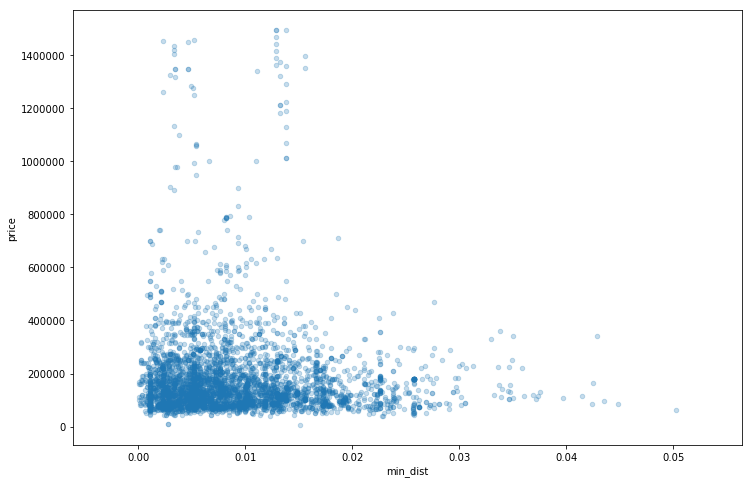

In [20]:
%matplotlib inline
propRecorridoA1 = propRecorridoA[propRecorridoA['price']< 1500000]
propRecorridoA2 = propRecorridoA1[propRecorridoA1['min_dist']< 0.06]
propRecorridoA2.plot.scatter('min_dist', 'price',alpha=0.25, figsize=(12,8))